In [1]:
import os
import platform
import sys
import copy
import random
import datetime
import math
import re
import heapq
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.pylab as pltylab
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from scipy import stats
from scipy.stats import chi2
from scipy.spatial import distance
from scipy.stats import norm
from scipy.optimize import curve_fit
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet
import sklearn.metrics as metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from adjustText import adjust_text
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from venn import venn
import logging
from rdkit import Chem
from rdkit.Chem import PandasTools
import matplotlib.image as mpimg
import venn
import multiprocessing as mp
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import warnings
import pylab as py 
warnings.filterwarnings('ignore')
from Slim_TPCA import Slim_TPCA
from scipy.stats import gaussian_kde
from statsmodels.stats.multitest import multipletests

In [20]:
# function: Error output settings
def logging_output(err_string, mode_string) :
    if mode_string == 'debug' :
        logging.debug('this is the '+str(err_string))
    if mode_string == 'info' :
        logging.info('this is the '+str(err_string))
    if mode_string == 'warning' :
        logging.warning('this is the '+str(err_string))
    if mode_string == 'error' :
        logging.error('this is the '+str(err_string))
    if mode_string == 'critical' :
        logging.critical('this is the '+str(err_string))
    if mode_string == 'test' :
        logging.critical('this is for test')

def roc_simple_plot(positive_data_list, negtive_data_list, roc_custom_random_number, savefile): 
    roc_score=copy.deepcopy(positive_data_list)
    roc_label=[1 for unit in positive_data_list]
    negtive_data_list=[unit*1 for unit in negtive_data_list]
    roc_score += list(1 * np.array(random.sample(negtive_data_list,roc_custom_random_number))) 
    roc_label += [0] * roc_custom_random_number
    #print(roc_score)
    #roc_curve:Plot Receiver operating characteristic (ROC) curve
    fpr,tpr,threshold = roc_curve(roc_label, roc_score, pos_label = 1)
    #auc:Compute Area Under the Curve (AUC) using the trapezoidal rule.
    roc_auc = auc(fpr,tpr)
    plt.figure(figsize=(8,4))
    plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
    plt.plot(fpr, tpr, label='AUC={}'.format(round(roc_auc,4)))
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc=4, fontsize=12)
    plt.title('ROC Curve', fontsize=14)
    plt.gcf().set_facecolor('white')
    if savefile != '' :
        plt.savefig(savefile,dpi=600)
    return roc_auc

# Analyze the results of train
def roc_simple(positive_data_list, negtive_data_list, roc_custom_random_number): 
    roc_score=copy.deepcopy(positive_data_list)
    roc_label=[1 for unit in positive_data_list]
    negtive_data_list=[unit*(-1) for unit in negtive_data_list]
    roc_score += list(-1 * np.array(random.sample(negtive_data_list,roc_custom_random_number))) 
    roc_label += [0] * roc_custom_random_number
    #print(roc_score)
    #roc_curve:Plot Receiver operating characteristic (ROC) curve
    fpr,tpr,threshold = roc_curve(roc_label, roc_score, pos_label = 1)
    #auc:Compute Area Under the Curve (AUC) using the trapezoidal rule.
    roc_auc = auc(fpr,tpr)
    return roc_auc


# sub-function: one_list mode is using a given column name, customize a pair of protein pairs
# sub-function: two_list mode is using a given column name, customize a pair of protein pairs
# Use two columns to obtain paired proteins or states. Remember, here the two 
# columns of elements must not intersect at all
# sub-function: status_list is customize protein state pairs based on the given merge(column name is protein+_+state) table
# The paired list is mock:infect1; newline mock:infect2, etc.
def pair_table_make(target_list, pair_method) :
    if pair_method=='one_list' :
        pair_protein_list = []
        pair_protein_A_list = []
        pair_protein_B_list = []
        pair_table1_list = [[1 for j in range(len(target_list))] for i in range(len(target_list))]
        np_triangles_list = np.triu(pair_table1_list, 1).tolist()
        for i in range(len(np_triangles_list)) :
            for j in range(len(np_triangles_list[i])) :
                if np_triangles_list[i][j] == 1 :
                    #pair_protein_list.append([target_list[i], target_list[j]])
                    pair_protein_A_list.append(target_list[i])
                    pair_protein_B_list.append(target_list[j])
        pair_protein_list.append(pair_protein_A_list)
        pair_protein_list.append(pair_protein_B_list)
        return pair_protein_list
    if pair_method=='two_list' :
        pair_protein_list = []
        pair_protein_A_list = []
        pair_protein_B_list = []
        for i in range(len(target_list[0])) :
            for j in range(len(target_list[1])) :
                pair_protein_A_list.append(target_list[0][i])
                pair_protein_B_list.append(target_list[1][j])
        pair_protein_list.append(pair_protein_A_list)
        pair_protein_list.append(pair_protein_B_list)
        return pair_protein_list
    if pair_method=='status_list' :
        merge_table=target_list[0]
        pair_suffix_list=target_list[1]
        logging_output('Function: status_pair_table_maker start','debug')
        list_pro = merge_table.iloc[:,0].tolist()
        status1_pro_list=[]
        status2_pro_list=[]
        pro_list=[]
        for pro_status in list_pro :
            if '_' in pro_status :
                pro_status_list=pro_status.split('_')
                pro_list.append(pro_status_list[0])
            else :
                pro_list.append(pro_status)
        pro_list_unique=list(set(pro_list))
        for pro_unit in pro_list_unique :
            for pair_suffix_list_index in range(len(pair_suffix_list[0])) :
                status1_pro_list.append(pro_unit+pair_suffix_list[0][pair_suffix_list_index])
                status2_pro_list.append(pro_unit+pair_suffix_list[1][pair_suffix_list_index])
        pair_table=pd.DataFrame({'Status A':status1_pro_list, 'Status B':status2_pro_list})
        pair_table_found = pair_table[np.array([pair_table.iloc[:,0][i] in list_pro for i in range(len(pair_table))]) &
                                      np.array([pair_table.iloc[:,1][i] in list_pro for i in range(len(pair_table))])].reset_index(drop=True)
        return pair_table_found



# Use two columns of data for comparison and add the comparison values to the first table
def pd_col_exchange_for_merge(pd_table1, alig_table1_col1_name, alig_table1_col2_name) :
    alig_table1_col1_list=pd_table1[alig_table1_col1_name].tolist()
    alig_table1_col2_list=pd_table1[alig_table1_col2_name].tolist()
    new_col1_list=[]
    new_col2_list=[]
    for i in range(len(alig_table1_col1_list)) :
        if alig_table1_col1_list[i] < alig_table1_col2_list[i] :
            new_col1_list.append(alig_table1_col1_list[i])
            new_col2_list.append(alig_table1_col2_list[i])
        else :
            new_col1_list.append(alig_table1_col2_list[i])
            new_col2_list.append(alig_table1_col1_list[i])
    pd_new_table1=copy.deepcopy(pd_table1)
    pd_new_table1[alig_table1_col1_name]=new_col1_list
    pd_new_table1[alig_table1_col2_name]=new_col2_list
    return pd_new_table1


# Use two columns of data for comparison and add the comparison values to the first table
def pd_col_exchange_for_merge_simple(cmp_name) :
    colname_list=cmp_name.split('_vs_')
    colname1=colname_list[0]
    colname2=colname_list[1]
    new_colname1=''
    if colname1 < colname2 :
        new_colname1=colname2+'_vs_'+colname1
    else :
        new_colname1=colname1+'_vs_'+colname2
    return new_colname1

# Median correction according to the column specified by median_list
def median_value_correction(table_for_median, median_list) :
    result_table=copy.deepcopy(table_for_median)
    m_value_array = np.median(result_table.iloc[:,median_list], axis=0)
    m_value = np.median(m_value_array)
    print(m_value_array);print(m_value)
    for i in range(len(median_list)):
        result_table.iloc[:,[median_list[i]]] = result_table.iloc[:,[median_list[i]]] / m_value_array[i] * m_value
    return result_table



def merge_repeat(pd_table, merge_repeat_dict) :
    print(merge_repeat_dict['accession_index'])
    accession_index=merge_repeat_dict['accession_index']
    repeat_list=merge_repeat_dict['repeat_list']
    PSM_list=merge_repeat_dict['PSM_list']
    PSM_sum_index=merge_repeat_dict['PSM_sum_index']
    pd_table_list_1=[pd_table.iloc[:, repeat_unit] for repeat_unit in repeat_list]
    print(pd_table_list_1)
    pd_table_list_2=[pd_table_list_1[repeat_index].values*pd_table.iloc[:, [PSM_list[repeat_index] for unit in range(pd_table_list_1[repeat_index].shape[1])]].values for repeat_index in range(len(pd_table_list_1))]
    print(pd_table_list_2)
    pd_table_list_zero=np.zeros(pd_table_list_2[0].shape)
    print(pd_table_list_zero)
    for unit in pd_table_list_2 : pd_table_list_zero=pd_table_list_zero+unit; print(pd_table_list_zero)
    pd_table_list_zero=pd_table_list_zero/pd_table.iloc[:, [PSM_sum_index for unit in range(pd_table_list_zero.shape[1])]]
    print(pd_table.iloc[:, [PSM_sum_index for unit in range(pd_table_list_zero.shape[1])]])
    print(pd_table_list_zero)
    pd_merge_repeat_table=pd.concat([pd_table.iloc[:, [accession_index]], pd_table_list_zero], axis=1)
    pd_merge_repeat_table_colname_list=copy.deepcopy([accession_index])
    pd_merge_repeat_table_colname_list.extend(repeat_list[0])
    pd_merge_repeat_table_colname=[pd_table.columns.tolist()[unit] for unit in pd_merge_repeat_table_colname_list]
    pd_merge_repeat_table.columns=pd_merge_repeat_table_colname
    return pd_merge_repeat_table



# first TPCA function
# function: Normalised TPCA curves
# Use a column as the denominator and the rest 
# of the columns as the denominator for the operation
# Divided by a column of ref_col, converted to soluble fraction
# loc：works on labels in the index.
# iloc：works on the positions in the index (so it only takes integers).
def preproc(table, ref_col=1):
    logging_output("------preproc",'debug')
    logging_output(table,'debug')
    if ref_col == False:
        return table
    else:
        table_clean = copy.copy(table)
        for col in table_clean.columns[1:]: 
            # part 1
            soluble_fraction = table_clean.loc[:,col] / table.iloc[:, ref_col]
            table_clean.loc[:,col] = soluble_fraction
        logging_output(table_clean,'debug')
        logging_output("------preproc:end",'debug')
        return table_clean


# function: Calculating distances of paired matrices, and obtaining the matrix
# Generate a two-dimensional matrix where the values at 
# the (i,j) positions represent the distance between the 
# protein represented in row i and the protein represented in column j
# ---------sub function---------
# preproc: preproc return dist table
# distance.cdist: Compute distance between each pair of the two collections of inputs.
# round: Retain a few decimal places
# ---------sub function---------
def dist(table, ref_col=1, method='cityblock'):
    logging_output("------dist",'debug')
    logging_output(table,'debug')
    table_clean = preproc(table, ref_col)
    table_values = tuple(table.iloc[:,1:].values)
    dist_matrix = pd.DataFrame(distance.cdist(table_values, table_values, metric=method), index=table_clean.iloc[:,0], columns = table_clean.iloc[:,0])
    dist_matrix.index.name = ''
    dist_matrix.columns.name = ''
    logging_output(round(dist_matrix,6),'debug')
    logging_output("------dist:end",'debug')
    return round(dist_matrix,6)


# function: find the presence of paired proteins in pair_table table by search table
# reset_index: It is to remove the original column index and reset the index
# explain the line in part 1 in the bellow
# CMD1: 'a' in ['a','b','c'] for i in range(len(['a','b','c']))
# keypoint is the i
# RESULT1: [True, False, True]
# CMD1: np.array([True, False, True]) & np.array([True, True, True])
# RESULT1: array([ True, False,  True])
def pair_found(table, pair_table, ref_col=1):
    logging_output("------pair_found",'debug')
    logging_output(table,'debug')
    logging_output(pair_table,'debug')
    table_clean = preproc(table, ref_col)
    list_pro = list(table_clean.iloc[:,0])
    # part 1
    pair_table_found = pair_table[np.array([pair_table.iloc[:,0][i] in list_pro for i in range(len(pair_table))]) &
                                  np.array([pair_table.iloc[:,1][i] in list_pro for i in range(len(pair_table))])].reset_index(drop=True)
    logging_output(pair_table_found,'debug')
    logging_output("------pair_found:end",'debug')
    return pair_table_found


def roc(table, pair_table, negtive_number, ref_col=1, method='cityblock'): # 计算ROC的TPR, FPR, AUC
    pair_table_found = pair_found(table, pair_table, ref_col)
    dist_matrix = dist(table, ref_col, method)
    roc_label, roc_score = [], [];i=0
    for i in range(len(pair_table_found)): # 寻找positive的数�
        pro_a, pro_b = pair_table_found.iloc[i,0], pair_table_found.iloc[i,1]
        roc_score.append(-1 * dist_matrix.loc[pro_a,pro_b])
        roc_label.append(1);i=i+1
        dist_matrix.loc[pro_a, pro_b], dist_matrix.loc[pro_b, pro_a] = 0,0
    neg_values = np.triu(dist_matrix, k=0).flatten()
    neg_values = neg_values[neg_values!=0]
    random.seed(42)
    if negtive_number > len(neg_values) :
        negtive_number = len(neg_values)
    roc_score += list(-1 * np.array(random.sample(list(neg_values),negtive_number))) # 混入10,000个negative的数�
    roc_label += [0] * negtive_number
    fpr,tpr,threshold = roc_curve(roc_label, roc_score, pos_label = 1)
    roc_auc = auc(fpr,tpr)
    return fpr, tpr, round(roc_auc,4)


def roc_score_label(table, pair_table, negtive_number, ref_col=1, method='cityblock'): # 计算ROC的TPR, FPR, AUC
    pair_table_found = pair_found(table, pair_table, ref_col)
    dist_matrix = dist(table, ref_col, method)
    roc_label, roc_score = [], [];i=0
    roc_real_label=[]
    for i in range(len(pair_table_found)): # 寻找positive的数�
        pro_a, pro_b = pair_table_found.iloc[i,0], pair_table_found.iloc[i,1]
        roc_score.append(-1 * dist_matrix.loc[pro_a,pro_b])
        roc_label.append(1);i=i+1;print(i)
        dist_matrix.loc[pro_a, pro_b], dist_matrix.loc[pro_b, pro_a] = 0,0
        roc_real_label.append(pro_a+'_vs_'+pro_b)
    neg_values = np.triu(dist_matrix, k=0).flatten()
    neg_values = neg_values[neg_values!=0]
    random.seed(42)
    if negtive_number > len(neg_values) :
        negtive_number = len(neg_values)
    # roc_score += list(-1 * np.array(random.sample(list(neg_values),negtive_number))) # 混入10,000个negative的数�
    # roc_label += [0] * negtive_number
    # fpr,tpr,threshold = roc_curve(roc_label, roc_score, pos_label = 1)
    # roc_auc = auc(fpr,tpr)
    return roc_label, roc_score, roc_real_label


def roc_plot(table, pair_table, negtive_number, ref_col=1, method='cityblock'): # 根据上一步得到的FPR、TPR来画ROC画图函数
    fpr, tpr, roc_auc = roc(table, pair_table, negtive_number, ref_col, method)
    plt.figure(figsize=(4,4))
    plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
    plt.plot(fpr, tpr, label='AUC={}'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc=4, fontsize=12)
    plt.title('ROC Curve', fontsize=14)
    return roc_auc


# function: Convert the distance matrix of pairs of proteins into a one-dimensional list and place it in a panda table
# Calculate the distance of protein pairs
#Euclidean distance calculation with elements common to paired matrices
#The following comments are the format of the returned data
#  Protein A Protein B  No. of Publications      Dist
#0    P40337    Q16665                   41  5.185614
def pair_dist(table, pair_table, ref_col=1, method='cityblock'): 
    logging_output("------pair_dist",'debug')
    logging_output(table,'debug')
    logging_output(pair_table,'debug')
    pair_table_found = pair_found(table, pair_table, ref_col)
    dist_matrix = dist(table, ref_col, method)
    l_dist = []
    for i in range(len(pair_table_found)):
        pro_a, pro_b = pair_table_found.iloc[i,0], pair_table_found.iloc[i,1]
        d = dist_matrix.loc[pro_a, pro_b]
        l_dist.append(d)
    pair_table_found['Dist'] = l_dist
    logging_output(pair_table_found,'debug')
    logging_output("------pair_dist:end",'debug')
    return pair_table_found


def pair_dist_simple(pair_table_found, dist_matrix): 
    logging_output("------pair_dist_simple",'debug')
    logging_output(pair_table_found,'debug')
    logging_output(dist_matrix,'debug')
    l_dist = []
    for i in range(len(pair_table_found)):
        pro_a, pro_b = pair_table_found.iloc[i,0], pair_table_found.iloc[i,1]
        d = dist_matrix.loc[pro_a, pro_b]
        l_dist.append(d)
    pair_table_found['Dist'] = l_dist
    logging_output(pair_table_found,'debug')
    logging_output("------pair_dist_simple:end",'debug')
    return pair_table_found


# function: The significance of the distance of each paired protein was 
# calculated using the data of all paired protein distances as input data.
# The probability (p-value) is calculated by randomly selecting the overall 
# data and calculating the ranking of that data in this data.
def pair_signature(pair_signature_random_number, table, pair_table, ref_col=1, method='cityblock'):
    logging_output("------pair_signature",'debug')
    logging_output(table,'debug')
    logging_output(pair_table,'debug')
    dist_matrix = dist(table, ref_col, method)
    pair_table_found = pair_dist(table, pair_table, ref_col, method)
    dist_values = np.triu(dist_matrix, k = 0).flatten()
    dist_values = list(dist_values[dist_values != 0])
    random.seed(42)
    if pair_signature_random_number > len(dist_values) :
        pair_signature_random_number = len(dist_values)
    dist_values = random.sample(dist_values, pair_signature_random_number)
    l_sig = []
    for i in range(len(pair_table_found)):
        #pro_a, pro_b have no means???
        pro_a, pro_b = pair_table_found.iloc[i,0], pair_table_found.iloc[i,1]
        d = pair_table_found['Dist'][i]
        l_sig.append(np.sum(dist_values < d) / pair_signature_random_number)
        print("------pair_signature: cycle"+str(len(pair_table_found)))
        print("------pair_signature: cycle"+str(i))
    pair_table_found['TPCA_Sig'] = l_sig
    # print(pair_table_found)
    print("------pair_signature:end")
    return pair_table_found


# function: Find the eligible protein complexes from the table, 
#---------where the protein complex exists as long as the protein in the protein complex appears in the table again
# ------Looking for complexes for subsequent analysis, the criterion was that at least three proteins were identified to
#Returns the number of proteins in the specified complex
#reset_index: Reset the index of the DataFrame, and use the default one instead
def complex_found(table, complex_table, ref_col=1): 
    logging_output("------complex_found",'debug')
    logging_output(table,'debug')
    logging_output(complex_table,'debug')
    table_clean = preproc(table, ref_col)
    complex_out = complex_table[complex_table['Organism']=='Human'].reset_index(drop=True)
    sub_found, num_sub_found = [], []
    for i in range(len(complex_out)):
        l_sub = complex_out['subunits(UniProt IDs)'][i].split(';')
        l_found = [sub for sub in l_sub if sub in list(table_clean.iloc[:,0])]
        sub_found.append(';'.join(l_found))
        num_sub_found.append(len(l_found))
        logging_output("------complex_found: cycle"+str(len(complex_out)),'debug')
        logging_output("------complex_found: cycle"+str(i),'debug')
    complex_out['Subunit_Found'] = sub_found
    complex_out['No_Subunit_Found'] = num_sub_found # of proteins identified in the complex
    complex_out = complex_out[complex_out['No_Subunit_Found']>1].reset_index(drop=True)
    logging_output(complex_out,'debug')
    logging_output("------complex_found:end",'debug')
    return complex_out


# function: Detecting the significance of a protein complex in terms of the number of proteins in 
# it (a certain number of randomly generated protein complexes with the same number of proteins is used as input data)
# Return the mean and standard deviation of individual protein complexes
# ComplexID ComplexName ...  Avg_Dist Avg_Dist_Derived
# 3 4 Multisubunit ACTR coactivator complex ... 0.830157 0.546401
# part 1: Although it will be duplicated,
# the averaging algorithm avoids the impact of duplication
def complex_dist(table, complex_table, ref_col=1, method='cityblock'):
    logging_output("------complex_dist",'debug')
    logging_output(table,'debug')
    logging_output(complex_table,'debug')
    complex_table_found = complex_found(table, complex_table, ref_col)
    dist_matrix = dist(table, ref_col, method)
    l_dist, l_dist_derived = [], []
    for i in range(len(complex_table_found)):
        l_sub = complex_table_found['Subunit_Found'][i].split(';')
        sub_matrix = dist_matrix.loc[l_sub, l_sub]
        # part 1
        avg_dist = np.nanmean(sub_matrix.replace(0, np.nan))
        l_dist.append(avg_dist)
        l_dist_derived.append(1/(1+avg_dist))
        logging_output("complex_dist:cycle",'debug')
        logging_output(l_sub,'debug')
        logging_output(sub_matrix,'debug')
        logging_output("complex_dist:cycle_end",'debug')
    complex_table_found['Avg_Dist'] = l_dist
    complex_table_found['Avg_Dist_Derived'] = l_dist_derived
    logging_output(complex_table_found,'debug')
    logging_output("------complex_dist:end",'debug')
    return complex_table_found


# function: Calculating the significance of protein complexes
# part 1: Calculate the mean and standard deviation of the overall distance matrix
# part 2: #with n and avg_dist calculated in pairs of matrices as parameters.
# The mean and variance calculated from the distance matrix of all proteins were used as
# parameters to establish the parameters of the normal distribution z
# Then obtain the probability that the normal distribution is greater than 0
# part 3: Probability of being greater than 0 in a normal distribution
def complex_signature_normal(table, complex_table, ref_col=1, method='cityblock'):
    logging_output("------complex_signature_normal",'debug')
    logging_output(table,'debug')
    logging_output(complex_table,'debug')
    complex_table_found = complex_dist(table, complex_table, ref_col)
    dist_matrix = dist(table, ref_col, method)
    mu, sig = np.nanmean(dist_matrix.replace(0, np.nan)), np.nanstd(dist_matrix.replace(0, np.nan)) 
    l_sig = []
    # part 2
    for i in range(len(complex_table_found)):
        n = complex_table_found['No_Subunit_Found'][i]
        avg_dist = complex_table_found['Avg_Dist'][i]
        z = (avg_dist - mu) * (n ** (1/2)) / sig
        # part 3
        l_sig.append(1 - norm.sf(z))
        logging_output("------complex_signature_normal: cycle"+str(len(complex_table_found)),'debug')
        logging_output("------complex_signature_normal: cycle"+str(i),'debug')
    complex_table_found['TPCA_Sig'] = l_sig
    logging_output(complex_table_found,'debug')
    logging_output("------complex_signature_normal:end",'debug')
    return complex_table_found


# function: 10,000 protein complexes randomly generated based on the number 
# of proteins contained in the protein complex.
# (2 proteins, 3 proteins, 4 proteins)
# Randomly calculate the distance of 10,000 proteins pairs by num is 1,2,3,4 and so on
# part 1: Indexed by the number of proteomes forming complexes
# The average of the distance matrix of these n groups of proteins 
# (n indicates the number of proteins in the protein complex)
# was examined separately
# The above content is randomly sampled 10,000 times,
# and the results are added to the corresponding list in turn
# Returns a random list for the specified number of proteins
# part 2: numpy.nanmean() function can be used to calculate 
# the average of the array ignoring NaN values
def random_10k(random_10k_number, table, complex_table, ref_col=1, method='cityblock'):
    logging_output("------random_10k",'debug')
    logging_output(table,'debug')
    logging_output(complex_table,'debug')
    l_n = list(set(complex_found(table, complex_table, ref_col)['No_Subunit_Found']))
    l_n.sort()
    dic_out = {}
    pairs_dist_table = dist(table, ref_col, method)
    # part 1
    for num in l_n:
        l_10k_dist = []
        random.seed(42)
        if num > len(list(pairs_dist_table.index)) :
            num = len(list(pairs_dist_table.index))
        for i in range(random_10k_number):
            random_proteins = random.sample(list(pairs_dist_table.index), num)
            random_sub_table = pairs_dist_table.loc[random_proteins, random_proteins].replace(0, np.nan)
            # part 2
            l_10k_dist.append(np.nanmean(random_sub_table))
        dic_out[num] = l_10k_dist
        logging_output("------random_10k: cycle"+str(len(l_n)),'debug')
        logging_output("------random_10k: cycle"+str(i),'debug')
    logging_output(dic_out,'debug')
    logging_output("------random_10k:end",'debug')
    return dic_out


# function: Calculate the empirical P-value, Z-score of the complex
# Calculate the empirical P-value, Z-score of the complex
# return the number of random_table. the number indicates the number of protein in complex
# return complex_table_found have the col of TPCA_Sig_P-value and TPCA_Sig_Z-score
# part 1: Z-Score
# Compute the z score of each value in the sample, relative to the sample mean and standard deviation
# ????Why only the last value is returned
# in there stats.zscore(l_random10000_derived)[-1] is avg_dist_derived
# Put the value avg_dist_derived into all variables for normalization,then pick it
def complex_signature_sample(random_10k_number, complex_signature_sample_random_number, table, complex_table, ref_col=1, method='cityblock'):
    logging_output("------complex_signature_sample",'debug')
    logging_output(table,'debug')
    logging_output(complex_table,'debug')
    complex_table_found = complex_dist(table, complex_table, ref_col)
    dic_random = random_10k(random_10k_number, table, complex_table, ref_col, method)
    p_value, z_score = [], []
    for i in range(len(complex_table_found)):
        n = complex_table_found['No_Subunit_Found'][i]
        avg_dist = complex_table_found['Avg_Dist'][i]
        avg_dist_derived = complex_table_found['Avg_Dist_Derived'][i]
        l_random10000 = dic_random[n]
        #why add avg_dist_derived here
        l_random10000_derived = list(1/(1+np.array(l_random10000))) + [avg_dist_derived]
        p_value.append(np.sum(np.array(l_random10000)<avg_dist)/complex_signature_sample_random_number)
        # part 1
        z_score.append(stats.zscore(l_random10000_derived)[-1])
        logging_output("complex_signature_sample,cycle",'debug')
        logging_output(l_random10000_derived,'debug')
        logging_output(stats.zscore(l_random10000_derived),'debug')
        logging_output(stats.zscore(l_random10000_derived)[-1],'debug')
        logging_output("complex_signature_sample,cycle:end",'debug')
    complex_table_found['TPCA_Sig_P-value'] = p_value
    complex_table_found['TPCA_Sig_Z-score'] = z_score
    random_table = pd.DataFrame(dic_random)
    logging_output(random_table,'debug')
    logging_output(complex_table_found,'debug')
    logging_output("------complex_signature_sample:end",'debug')
    return random_table, complex_table_found


# function: Compare two lists with each other by their respective 
# -----indexes and return the result of the comparison
# The index rows shared by the two matrices are taken out to form two matrices respectively
# part 1: set: Create an unordered set of unduplicated elements
# Filter elements that are contained in both lists
# part 2: Merge DataFrame or named Series objects with a database-style join
# on: The name of the column or index level to join.
# Must be found in the left and right DataFrame objects
# part 3: reset pandas index
def align(table_1, table_2, ref_col=1):
    logging_output("------align",'debug')
    logging_output(table_1,'debug')
    logging_output(table_2,'debug')
    table_1_align = preproc(table_1, ref_col)
    table_2_align = preproc(table_2, ref_col)
    # part 1
    list_pro = list(set(table_1_align.iloc[:,0]) & set(table_2_align.iloc[:,0]))
    # part 2
    table_1_align = pd.merge(table_1_align, pd.DataFrame({table_1_align.columns[0]:list_pro}), on=table_1.columns[0])
    table_2_align = pd.merge(table_2_align, pd.DataFrame({table_2_align.columns[0]:list_pro}), on=table_2.columns[0])
    # part 3
    table_1_align = table_1_align.sort_values(by=table_1_align.columns[0]).reset_index(drop=True)
    table_2_align = table_2_align.sort_values(by=table_2_align.columns[0]).reset_index(drop=True)
    logging_output(table_1_align.columns[0],'debug')
    logging_output(list_pro,'debug')
    logging_output(pd.DataFrame({table_1_align.columns[0]:list_pro}),'debug')
    logging_output(table_1_align,'debug')
    logging_output(table_2_align,'debug')
    logging_output("------align:end",'debug')
    return table_1_align, table_2_align


# function: Calculate the difference in distance between the paired proteins in the two data sets
#----No call to
def dynamic_pair(dynamic_pair_random_number, table_1, table_2, pair_table, ref_col=1, method='cityblock'):
    logging_output("------dynamic_pair",'debug')
    logging_output(table_1,'debug')
    logging_output(table_2,'debug')
    logging_output(pair_table,'debug')
    table_1_align, table_2_align = align(table_1, table_2, ref_col)
    pair_dist_1 = pair_dist(table_1_align, pair_table, ref_col, method)
    pair_dist_2 = pair_dist(table_2_align, pair_table, ref_col, method)
    pair_dist_change = pd.merge(pair_dist_1, pair_dist_2, on=list(pair_dist_1.columns[:-1]), suffixes=('_1','_2'))
    pair_dist_change['Dist_change'] = pair_dist_change['Dist_1'] - pair_dist_change['Dist_2']
    dist_matrix_1 = dist(table_1_align, ref_col)
    dist_matrix_2 = dist(table_2_align, ref_col)
    dist_matrix_dynamic = dist_matrix_1 - dist_matrix_2
    dist_values_dynamic = np.triu(dist_matrix_dynamic, k=0).flatten()
    random.seed(42)
    if dynamic_pair_random_number > len(list(dist_values_dynamic[dist_values_dynamic!=0])) :
        dynamic_pair_random_number = len(list(dist_values_dynamic[dist_values_dynamic!=0]))
    print('list(dist_values_dynamic[dist_values_dynamic!=0]) is '+str(len(list(dist_values_dynamic[dist_values_dynamic!=0]))))
    print('random number is '+str(dynamic_pair_random_number))
    dist_values_dynamic = random.sample(list(dist_values_dynamic[dist_values_dynamic!=0]), dynamic_pair_random_number)
    dynamic_p = []
    for i in range(len(pair_dist_change)):
        dist_change = pair_dist_change['Dist_change'][i]
        dynamic_p.append(np.sum(dist_values_dynamic > dist_change) / dynamic_pair_random_number)
    pair_dist_change['Dynamic_Sig'] = dynamic_p
    logging_output(pair_dist_change,'debug')
    logging_output("------dynamic_pair:end",'debug')
    return pair_dist_change


# function: Calculate the P and Z values for the protein complex in the two data sets
# part 1: last four columns names by suffixes("-1","-2")
# part 2: Distance matrix of the control group
# The distance matrix of the experimental group
# Difference matrix: the difference of two distance matrices
# The numpy.nanstd() function calculates the standard 
# deviation along the specified axis while ignoring NaN.
# Calculate the mean and standard deviation of the difference matrix
def dynamic_complex_normal(table_1, table_2, complex_table, ref_col=1, method='cityblock'):
    logging_output("------dynamic_complex_normal",'debug')
    logging_output(table_1,'debug')
    logging_output(table_2,'debug')
    logging_output(complex_table,'debug')
    # part 1
    table_1_align, table_2_align = align(table_1, table_2, ref_col)
    complex_dist_1 = complex_dist(table_1_align, complex_table, ref_col, method)
    complex_dist_2 = complex_dist(table_2_align, complex_table, ref_col, method)
    complex_dist_change = pd.merge(complex_dist_1, complex_dist_2, on=list(complex_dist_1.columns[:-2]), suffixes=('_1','_2'))
    complex_dist_change['Avg_Dist_change'] = complex_dist_change['Avg_Dist_1'] - complex_dist_change['Avg_Dist_2']
    complex_dist_change['Avg_Dist_Derived_change'] = complex_dist_change['Avg_Dist_Derived_1'] - complex_dist_change['Avg_Dist_Derived_2']
    logging_output("dynamic_complex_normal:part1",'debug')
    logging_output(complex_dist_1,'debug')
    logging_output(complex_dist_2,'debug')
    logging_output(complex_dist_change,'debug')
    logging_output(complex_dist_1.columns[:-1],'debug')
    logging_output("dynamic_complex_normal:part2",'debug')
    # part 2
    dist_matrix_1 = dist(table_1_align, ref_col)
    dist_matrix_2 = dist(table_2_align, ref_col)
    dist_matrix_dynamic = dist_matrix_1 - dist_matrix_2
    mu, sig = np.nanmean(dist_matrix_dynamic.replace(0, np.nan)), np.nanstd(dist_matrix_dynamic.replace(0, np.nan))
    dynamic_p = []
    dynamic_z = []
    for i in range(len(complex_dist_change)):
        n = complex_dist_change['No_Subunit_Found'][i]
        avg_dist_change = complex_dist_change['Avg_Dist_change'][i]
        z = (avg_dist_change - mu) * (n ** (1/2)) / sig
        dynamic_z.append(z)
        dynamic_p.append(norm.sf(z)) # Calculate dynamic P-values
        logging_output("------dynamic_complex_normal: cycle"+str(len(complex_dist_change)),'debug')
        logging_output("------dynamic_complex_normal: cycle"+str(i),'debug')
    complex_dist_change['Dynamic_Z'] = dynamic_z
    complex_dist_change['Dynamic_P'] = dynamic_p
    logging_output(complex_dist_change,'debug')
    logging_output("------dynamic_complex_normal:end",'debug')
    return complex_dist_change


# function: Calculate the P and Z values for the protein complex in the two data sets
# part 1: complex_dist_change['Avg_Dist_Derived_change'] = 1 / (1+complex_dist_change['Avg_Dist_change'])
# part 2: ???two random table can subtraction?
# part 3: random_table_derived = 1 / (1+random_table)
# part 4: the percent point function ppf
def dynamic_complex_sample(dynamic_complex_sample_random_numbe, table_1, table_2, complex_table, ref_col=1, method='cityblock'):
    logging_output("------dynamic_complex_sample",'debug')
    logging_output(table_1,'debug')
    logging_output(table_2,'debug')
    logging_output(complex_table,'debug')
    table_1_align, table_2_align = align(table_1, table_2, ref_col)
    complex_dist_1 = complex_dist(table_1_align, complex_table, ref_col, method)
    complex_dist_2 = complex_dist(table_2_align, complex_table, ref_col, method)
    complex_dist_change = pd.merge(complex_dist_1, complex_dist_2, on=list(complex_dist_1.columns[:-2]), suffixes=('_1','_2'))
    complex_dist_change['Avg_Dist_change'] = complex_dist_change['Avg_Dist_1'] - complex_dist_change['Avg_Dist_2']
    dic_random_1 = random_10k(table_1, complex_table, ref_col, method)
    dic_random_2 = random_10k(table_2, complex_table, ref_col, method)
    random_table = pd.DataFrame(dic_random_1) - pd.DataFrame(dic_random_2)
    p_value, z_score = [], []
    for i in range(len(complex_dist_change)):
        n = complex_dist_change['No_Subunit_Found'][i]
        avg_dist = complex_dist_change['Avg_Dist_change'][i]
        # avg_dist_derived = complex_dist_change['Avg_Dist_Derived_change'][i]
        l_random10000 = random_table[n]
        # l_random10000_derived = random_table_derived[n] + [avg_dist_derived]
        p_value.append(np.sum(np.array(l_random10000)>avg_dist)/dynamic_complex_sample_random_numbe)
        # z_score.append(stats.zscore(l_random10000_derived)[-1])
        logging_output("------dynamic_complex_sample: cycle"+str(len(complex_dist_change)),'debug')
        logging_output("------dynamic_complex_sample: cycle"+str(i),'debug')
    complex_dist_change['Dynamic_P-value'] = p_value
    # part 4
    complex_dist_change['Dynamic_Z-score'] = -1 * norm.ppf(np.array(p_value) / 2)
    logging_output(random_table,'debug')
    logging_output(complex_dist_change,'debug')
    logging_output("------dynamic_complex_sample:end",'debug')
    return random_table, complex_dist_change

def complex_dist(table, complex_table, ref_col=1, method='cityblock'):
    complex_table_found = complex_found(table, complex_table, ref_col)
    dist_matrix = dist(table, ref_col, method)
    l_dist = []
    for i in range(len(complex_table_found)):
        l_sub = complex_table_found['Subunit_Found'][i].split(';')
        sub_matrix = dist_matrix.loc[l_sub, l_sub]
        avg_dist = np.nanmean(sub_matrix.replace(0, np.nan))
        l_dist.append(avg_dist)
    complex_table_found['Avg_Dist'] = l_dist
    complex_table_found['Avg_Dist_Derived'] = 1 / (1+np.array(l_dist))
    return complex_table_found


# Calculation of TPCA characteristics of complexes using normal distribution
# np.nanmean: Calculate the mean and standard deviation of all protein pair distances
# A normal distribution was constructed from the calculated mean and standard deviation, with the mean being the mean 'mu' of 
# the distances of all protein pairs and the standard deviation was the standard deviation 'sig' divide square root n of 
# the distances of all protein pairs, n was the size of the complex to be tested
# The p-value is derived from the z-score
def second_complex_signature_normal(table, complex_table, ref_col=1, method='cityblock'):
    complex_table_found = complex_dist(table, complex_table, ref_col)
    dist_matrix = dist(table, ref_col, method)
    mu, sig = np.nanmean(dist_matrix.replace(0, np.nan)), np.nanstd(dist_matrix.replace(0, np.nan))
    l_sig_z, l_sig_p = [], []
    for i in range(len(complex_table_found)):
        n = complex_table_found['No_Subunit_Found'][i]
        avg_dist = complex_table_found['Avg_Dist'][i]
        z = (avg_dist - mu) * (n ** (1/2)) / sig 
        l_sig_z.append(-1 * z)
        l_sig_p.append(1 - norm.sf(z))
    complex_table_found['TPCA_Sig_P-value'] = l_sig_p
    complex_table_found['TPCA_Sig_Z-score'] = l_sig_z
    return complex_table_found


def dynamic_complex_absolute_sample(table_1, table_2, complex_table, ref_col=1, method='cityblock'):
    table_1_align, table_2_align = align(table_1, table_2, ref_col)
    complex_dist_1 = complex_dist(table_1_align, complex_table, ref_col, method)
    complex_dist_2 = complex_dist(table_2_align, complex_table, ref_col, method)
    complex_dist_change = pd.merge(complex_dist_1, complex_dist_2, on=list(complex_dist_1.columns[:-2]), suffixes=('_1','_2'))
    complex_dist_change['Avg_Dist_change'] = complex_dist_change['Avg_Dist_1'] - complex_dist_change['Avg_Dist_2']
    complex_dist_change['Avg_Dist_Derived_change'] = complex_dist_change['Avg_Dist_Derived_1'] - complex_dist_change['Avg_Dist_Derived_2']
    dic_random_1 = random_10k(table_1_align, complex_table, ref_col, method)
    dic_random_2 = random_10k(table_2_align, complex_table, ref_col, method)
    random_table = pd.DataFrame(dic_random_1) - pd.DataFrame(dic_random_2)
    random_table_derived = 1/(1+pd.DataFrame(dic_random_1)) - 1/(1+pd.DataFrame(dic_random_2))
    p_value, z_score = [], []
    for i in range(len(complex_dist_change)):
        n = complex_dist_change['No_Subunit_Found'][i]
        avg_dist = complex_dist_change['Avg_Dist_change'][i]
        avg_dist_derived = complex_dist_change['Avg_Dist_Derived_change'][i]
        l_random10000 = random_table[n]
        l_random10000_derived = list(random_table_derived[n]) + [avg_dist_derived]      
        p_value.append(np.sum(np.array(l_random10000)>avg_dist)/10000)
        z_score.append(-1 * stats.zscore(l_random10000_derived)[-1])
    complex_dist_change['Dynamic_P'] = p_value
    complex_dist_change['Dynamic_Z'] = z_score
    return random_table, random_table_derived, complex_dist_change


def dynamic_complex_absolute_normal(table_1, table_2, complex_table, ref_col=1, method='cityblock'):
    table_1_align, table_2_align = align(table_1, table_2, ref_col)
    complex_dist_1 = complex_dist(table_1_align, complex_table, ref_col, method)
    complex_dist_2 = complex_dist(table_2_align, complex_table, ref_col, method)
    complex_dist_change = pd.merge(complex_dist_1, complex_dist_2, on=list(complex_dist_1.columns[:-2]), suffixes=('_1','_2'))
    complex_dist_change['Avg_Dist_change'] = complex_dist_change['Avg_Dist_1'] - complex_dist_change['Avg_Dist_2']
    complex_dist_change['Avg_Dist_Derived_change'] = complex_dist_change['Avg_Dist_Derived_1'] - complex_dist_change['Avg_Dist_Derived_2']
    dist_matrix_1 = dist(table_1_align, ref_col)
    dist_matrix_2 = dist(table_2_align, ref_col)
    dist_matrix_dynamic = dist_matrix_1 - dist_matrix_2
    mu, sig = np.nanmean(dist_matrix_dynamic.replace(0, np.nan)), np.nanstd(dist_matrix_dynamic.replace(0, np.nan))
    dynamic_p = []
    dynamic_z = []
    for i in range(len(complex_dist_change)):
        n = complex_dist_change['No_Subunit_Found'][i]
        avg_dist_change = complex_dist_change['Avg_Dist_change'][i]
        z = (avg_dist_change - mu) * (n ** (1/2)) / sig
        dynamic_z.append(z)
        dynamic_p.append(norm.sf(z))
    complex_dist_change['Dynamic_Z'] = dynamic_z
    complex_dist_change['Dynamic_P'] = dynamic_p
    return complex_dist_change


def random_n(table, complex_table, ref_col=1, method='cityblock', samplesize=10000):
    l_n = list(set(complex_found(table, complex_table, ref_col)['No_Subunit_Found'])) 
    l_n.sort()
    dic_out = {}
    pairs_dist_table = dist(table, ref_col, method)
    pairs_dist_table = pairs_dist_table.replace(0, np.nan);cycle_number=0
    for num in l_n:
        l_n_dist = [];print(len(l_n));print(cycle_number);cycle_number+=1
        random.seed(42)
        if num > len(list(pairs_dist_table.index)) :
            num = len(list(pairs_dist_table.index))
        for i in range(samplesize):
            random_proteins = random.sample(list(pairs_dist_table.index), num)
            random_sub_table = pairs_dist_table.loc[random_proteins, random_proteins]
            l_n_dist.append(np.nanmean(random_sub_table))
        dic_out[num] = l_n_dist
    return dic_out


def dynamic_complex_random_table_otain(table_1, table_2, complex_table, ref_col=1, method='cityblock', samplesize=10000):
    table_1_align, table_2_align = align(table_1, table_2, ref_col)
    complex_dist_1 = complex_dist(table_1_align, complex_table, ref_col, method)
    complex_dist_2 = complex_dist(table_2_align, complex_table, ref_col, method)
    complex_dist_change = pd.merge(complex_dist_1, complex_dist_2, on=list(complex_dist_1.columns[:-2]), suffixes=('_1','_2'))
    complex_dist_change['Avg_Dist_relative_change'] = (complex_dist_change['Avg_Dist_1'] - complex_dist_change['Avg_Dist_2']) / complex_dist_change['Avg_Dist_1']
    dic_random_1 = random_n(table_1_align, complex_table, ref_col, method, samplesize)
    dic_random_2 = random_n(table_2_align, complex_table, ref_col, method, samplesize)
    random_table = (pd.DataFrame(dic_random_1) - pd.DataFrame(dic_random_2)) / pd.DataFrame(dic_random_1) 
    return random_table


# function: Switching paths between systems
def file_path_switch_between_sys(file_path) :
    if(platform.system()=="Windows") :
        file_path=file_path.replace("/", "\\")
        return file_path
    if(platform.system()=="Linux") :
        print("start transf linux2")
        print(file_path)
        file_path=file_path.replace("\\", "/").replace("//","/")
        print(file_path)
        return file_path

# make sure which number should be used
def list_show_with_index(show_list, index_start=0) :
    pd.set_option('display.max_colwidth', None)
    return pd.DataFrame({'ID':show_list, 'cycle_num':range(0+index_start,len(show_list)+index_start)})


In [17]:
# ----------catalog----------
# Because the paper has not yet been published, the data in source_data(source_catalog) has not 
# yet been uploaded,if you need it, 
# you can contact the authors of the paper or contact the authors of the repository on github to get it.
article_catalog='article_data\\'
source_catalog='source_data\\'
database_catalog='database_data\\'
result_catalog = 'result_data\\'
# ----------catalog----------

In [4]:
# ----------mito information creat----------
# MitoCarta_pro_list is come from https://personal.broadinstitute.org/scalvo/MitoCarta3.0/human.mitocarta3.0.html
MitoCarta_pro_list=pd.read_excel(file_path_switch_between_sys(database_catalog+"MitoCarta_3_0\\Human.MitoCarta3.0.xls"), sheet_name=1, header=0)['UniProt'].tolist()
# select mito protein list, mito_SL protein list
GOCC_mito_table=pd.read_excel(file_path_switch_between_sys(source_catalog+"20230724_Mito_Multi.xlsx"), sheet_name=1, header=0)
GOCC_mito_list=GOCC_mito_table['Entry'].tolist()
GOCC_MLP_infor_list=GOCC_mito_table[GOCC_mito_table['Multi']==1]['Entry'].tolist()
mito_prot_list=list(set(GOCC_mito_list).union(set(MitoCarta_pro_list)))
MLP_infor_accession_list=copy.deepcopy(GOCC_MLP_infor_list)
mito_SL_protein_list=list(set(mito_prot_list).difference(set(MLP_infor_accession_list)))
print(len(mito_prot_list))
print(len(mito_SL_protein_list))
mito_prot_list_table=pd.DataFrame(mito_prot_list, columns=['whole mito'])
mito_SL_protein_list_table=pd.DataFrame(mito_SL_protein_list, columns=['SL mito'])
# ----------mito information creat----------

1485
983


In [5]:

# ----------new mito PPI data creat----------

review_table = pd.read_csv(file_path_switch_between_sys(database_catalog+'Uniprot\\uniprot_human_string_review_2022.10.15-06.30.16.31.tsv'), sep='\t', header=0)
unreview_table = pd.read_csv(file_path_switch_between_sys(database_catalog+'Uniprot\\uniprot_human_string_unreview-2022.10.15-06.29.27.31.tsv'), sep='\t', header=0)
uniprot_id_to_gene_id_table=pd.concat([review_table, unreview_table], axis=0, ignore_index=True)

APEX_CXMS_mito_ppi = pd.read_excel(file_path_switch_between_sys(article_catalog+'mito_ppi\\ac2c02116_si_002.xlsx'), sheet_name='inter-links of mito APEX-CXMS')
APEX_CXMS_mito_ppi = APEX_CXMS_mito_ppi[['Gene name1 first','Gene name2 first','itocho in GO1(1 means the mito-located protein, 0 means the non-mito located protein)']]
APEX_CXMS_mito_ppi.columns=['Gene name1 first','Gene name2 first','itocho in GO1']
APEX_CXMS_mito_ppi=APEX_CXMS_mito_ppi[['Gene name1 first','Gene name2 first']]
APEX_CXMS_mito_ppi.columns=['Gene A','Gene B']

CD_MS_mito_ppi = pd.read_excel(file_path_switch_between_sys(article_catalog+'mito_ppi\\41467_2023_39485_MOESM4_ESM.xlsx'), sheet_name='Figure 3a-3b', skiprows=1, header=0, usecols=[0,1,2,4])
CD_MS_mito_ppi = CD_MS_mito_ppi.iloc[0:152,:][['protein1','protein2']]
CD_MS_mito_ppi.columns=['Gene A','Gene B']

Sub_CL_mito_ppi = pd.read_excel(file_path_switch_between_sys(article_catalog+'mito_ppi\\ac2c01637_si_002.xlsx'), sheet_name='Table S10.', skiprows=2, header=0, usecols=[14,15,16,17,18,19]).dropna()
Sub_CL_mito_ppi.columns=['Protein A', 'Protein B', 'From site', 'To site', 'Pro a is_mito', 'Pro b is_mito']
SubPiXL_mito_ppi = pd.read_excel(file_path_switch_between_sys(article_catalog+'mito_ppi\\ac2c01637_si_002.xlsx'), sheet_name='Table S10.', skiprows=2, header=0, usecols=[21,22,23,24,25,26]).dropna()
SubPiXL_mito_ppi.columns=['Protein A', 'Protein B', 'From site', 'To site', 'Pro a is_mito', 'Pro b is_mito']
SubPiXL_mito_table=pd.concat([Sub_CL_mito_ppi,SubPiXL_mito_ppi],axis=0)[['Protein A', 'Protein B']]
SubPiXL_mito_table=pd_col_exchange_for_merge(SubPiXL_mito_table,'Protein A','Protein B')
SubPiXL_mito_table['align']=SubPiXL_mito_table['Protein A']+'_vs_'+SubPiXL_mito_table['Protein B']
SubPiXL_mito_table=SubPiXL_mito_table.drop_duplicates(subset=['align'],keep='first')
SubPiXL_mito_table=SubPiXL_mito_table[['Protein A','Protein B']]

Gene_mito_table=pd.concat([APEX_CXMS_mito_ppi, CD_MS_mito_ppi],axis=0)
print('Gene_mito_table',Gene_mito_table.shape)

geneID_to_proteinID_table=uniprot_id_to_gene_id_table[uniprot_id_to_gene_id_table['Entry'].isin(mito_prot_list)]
geneID_to_proteinID_table=geneID_to_proteinID_table[['Entry','Gene Names']].drop_duplicates(subset=['Entry'],keep='first')
geneID_to_proteinID_table=geneID_to_proteinID_table[['Entry','Gene Names']].drop_duplicates(subset=['Gene Names'],keep='first')
geneID_to_proteinID_table.columns=['Protein A','Gene A']
Gene_to_pro_mito_table=pd.merge(Gene_mito_table,geneID_to_proteinID_table,how='left',on='Gene A').dropna()
geneID_to_proteinID_table.columns=['Protein B','Gene B']
Gene_to_pro_mito_table=pd.merge(Gene_to_pro_mito_table,geneID_to_proteinID_table,how='left',on='Gene B').dropna()
Gene_to_pro_mito_table=Gene_to_pro_mito_table[['Protein A','Protein B']]
print('Gene_mito_table convert to Gene_to_pro_mito_table',Gene_to_pro_mito_table.shape)

pro_mito_table=pd.concat([SubPiXL_mito_table],axis=0)
whole_pro_mito_table=pd.concat([Gene_to_pro_mito_table,pro_mito_table],axis=0)
whole_pro_mito_table=pd_col_exchange_for_merge(whole_pro_mito_table,'Protein A','Protein B')

whole_pro_mito_table['No. of Publications']=[1]*len(whole_pro_mito_table)
whole_pro_mito_table=whole_pro_mito_table[['Protein A','Protein B','No. of Publications']]
new_mito_PPI=whole_pro_mito_table[whole_pro_mito_table['Protein A']!=whole_pro_mito_table['Protein B']]
print('new_mito_PPI',new_mito_PPI.shape)
# ----------new mito PPI data creat----------


Gene_mito_table (805, 2)
Gene_mito_table convert to Gene_to_pro_mito_table (12, 2)
new_mito_PPI (240, 3)


In [6]:

# ----------complex information and ppi information from Tan et al----------

print('complex_infor_in_corum')
humanComplexes_table = pd.read_csv(file_path_switch_between_sys(database_catalog+'CORUM\\allComplexes.txt'), sep='\t', header=0)
pair_table0_human = pd.read_excel(file_path_switch_between_sys(article_catalog+'Science_human_TPP\\TPCA_table2.xlsx'))
TPCA_pair_table0 = copy.deepcopy(pair_table0_human)
TPCA_pair_table0['pro_a_vs_pro_b']=TPCA_pair_table0['Protein A']+'_vs_'+TPCA_pair_table0['Protein B']
TPCA_pair_table0['pro_a_vs_pro_b_exchange']=TPCA_pair_table0['pro_a_vs_pro_b'].apply(lambda x: pd_col_exchange_for_merge_simple(x))
# test if the pair is duplicated
len(TPCA_pair_table0['pro_a_vs_pro_b_exchange'].tolist())
len(set(TPCA_pair_table0['pro_a_vs_pro_b_exchange'].tolist()))
print(TPCA_pair_table0[(TPCA_pair_table0['Protein A'].isin(mito_prot_list)) & (TPCA_pair_table0['Protein B'].isin(mito_prot_list))])
# ----------complex information and ppi information from Tan et al----------


complex_infor_in_corum
       Protein A Protein B  No. of Publications    pro_a_vs_pro_b  \
77        Q07817    Q92934                   23  Q07817_vs_Q92934   
87        P23443    P42345                   21  P23443_vs_P42345   
159       P04049    P07900                   15  P04049_vs_P07900   
167       P04150    P07900                   14  P04150_vs_P07900   
240       Q07812    Q07817                   12  Q07812_vs_Q07817   
...          ...       ...                  ...               ...   
111373    O75947    Q9Y6H1                    1  O75947_vs_Q9Y6H1   
111565    P61221    Q96I99                    1  P61221_vs_Q96I99   
111636    P61221    Q7Z4W1                    1  P61221_vs_Q7Z4W1   
111644    Q9BV79    Q9UGC7                    1  Q9BV79_vs_Q9UGC7   
111756    Q00059    Q8WVM0                    1  Q00059_vs_Q8WVM0   

       pro_a_vs_pro_b_exchange  
77            Q92934_vs_Q07817  
87            P42345_vs_P23443  
159           P07900_vs_P04049  
167           P0

In [7]:

# ----------TPCA data for the whole proteome of 293T cells from Tan et al----------
TPCA_293T_3t_col_list=[0, 9, 12, 15]
TPCA_293T_table = pd.read_excel(file_path_switch_between_sys(article_catalog+'Science_human_TPP\\aan0346__Tables_S19_to_S27.xlsx'),sheet_name='Table S21',header=2).iloc[:, TPCA_293T_3t_col_list]
TPCA_293T_table=preproc(TPCA_293T_table, ref_col=1)
TPCA_293T_table=TPCA_293T_table.dropna()
TPCA_293T_table[TPCA_293T_table['Accession']=='P10809']
TPCA_name_accession_list=TPCA_293T_table['Accession'].tolist()
print(TPCA_293T_table)
TPCA_293T_table=TPCA_293T_table[np.sum(TPCA_293T_table.iloc[:,1:]>1.2, axis=1)==0]
TPCA_293T_mito_table = copy.deepcopy(TPCA_293T_table)
TPCA_293T_mito_table=TPCA_293T_mito_table[TPCA_293T_mito_table['Accession'].isin(mito_prot_list)]

TPCA_293T_list=[TPCA_293T_table, TPCA_293T_mito_table]
result_293T_prefix_list=['TPCA_293T_orgin', 'TPCA_mito_293T']
# ----------TPCA data for the whole proteome of 293T cells from Tan et al----------


     Accession  T37       T46       T55
0       A0AV96  1.0  0.734957  0.199532
1       A0AVF1  1.0  0.566271  0.096318
2       A0AVT1  1.0  0.876059  0.085906
3       A0FGR8  1.0  0.769132  0.204974
4       A0JNW5  1.0  0.932240  0.171410
...        ...  ...       ...       ...
7940    R4GMX3  1.0  0.723274  0.112750
7941    R4GN35  1.0  0.850110  0.194526
7942    R4GNH3  1.0  0.934221  0.304672
7943    S4R3H4  1.0  1.012826  0.424832
7944    S4R3N1  1.0  0.929029  0.500060

[7945 rows x 4 columns]


In [8]:
# this module is evaluate the PPI judging ability for CAT data
CAT_filename_prefix='20221122_ibmdm_sf2_thermo'

CAT_filename_dict={'iBMDM mito thermoshift-1': [0, 1, 3, 7], '20221019_293t_CAT_PROX_2.0': [0, 1, 2, 4], '20221122_ibmdm_sf2_thermo': [0, 2, 3, 4, 5]}
col_list = CAT_filename_dict[CAT_filename_prefix]
TPCA_table1 = pd.read_excel(file_path_switch_between_sys(source_catalog+CAT_filename_prefix+'.xlsx'), sheet_name=0, usecols=col_list, header=0)

CAT_filename_type1=['iBMDM mito thermoshift-1', '20221019_293t_CAT_PROX_2.0']
CAT_filename_type2=['20221122_ibmdm_sf2_thermo']

if CAT_filename_prefix in CAT_filename_type1 : TPCA_table1.columns = ['Accession','T_46','T_55', 'mitochondrial annotation']
if CAT_filename_prefix in CAT_filename_type1 : TPCA_table1['T_37']=[1]*len(TPCA_table1)
if CAT_filename_prefix in CAT_filename_type1 : TPCA_table1=TPCA_table1[['Accession','T_37','T_46','T_55', 'mitochondrial annotation']]
if CAT_filename_prefix in CAT_filename_type1 : TPCA_table1['Accession']=TPCA_table1['Accession'].apply(lambda x : (x.split('|'))[1])

if CAT_filename_prefix in CAT_filename_type2 : TPCA_table1.columns = ['Accession', 'mitochondrial annotation','T_37','T_46','T_55']
if CAT_filename_prefix in CAT_filename_type2 : TPCA_table1=TPCA_table1[['Accession','T_37','T_46','T_55', 'mitochondrial annotation']]

Mito_TPCA_table1=TPCA_table1[TPCA_table1['mitochondrial annotation']==1]
CAT_mito_prot_list=Mito_TPCA_table1['Accession'].tolist()

TPCA_temp_list=[]
TPCA_temp_list.append(TPCA_table1.iloc[:, [0, 1, 2, 3]])
TPCA_temp_list.append(Mito_TPCA_table1.iloc[:, [0, 1, 2, 3]])

result_prefix_list=[CAT_filename_prefix, CAT_filename_prefix+'_mito']

In [23]:
# MLP table, mito_prot_list come from CAT_analysis part
death_MLP_infor_table=pd.read_excel(file_path_switch_between_sys(source_catalog+"MLP_data.xlsx"))
death_MLP_infor_accession_list=death_MLP_infor_table[death_MLP_infor_table['MLP_infer']==1]['Accession'].tolist()


# ppi
# Iron_type='20221105'
# cupr_type='20221105'
# complex
# death_mito, MitoCarta
mito_prot_type='MitoCarta'
Iron_type='20221115'
cupr_type='20230703'
input_type='20230908'
result_whole_prefix='result_'+input_type
unit_name_list=['minus_rep1', 'plus_rep1', 'minus_rep2', 'plus_rep2']
Four_tempeture_split_list=[[0, 1+3*n, 2+3*n, 3+3*n] for n in range(4)]



# Missing a copper death data read, because it is not needed for now
if cupr_type=='20221115' : cupr_mito_col_index=[0,1]

if Iron_type=='20221115' : Iron_death_sheetnum_list=['Erastin-3', 'RSL3-3']
if Iron_type=='20221115' : Iron_death_filename=file_path_switch_between_sys(source_catalog+"20221115_ferroptosis_1080.xlsx")
if Iron_type=='20221115' : Iron_death_file_corr_collist=[[2,3,4,8,9,10],[5,6,7,11,12,13]]
if Iron_type=='20221115' : Iron_death_file_collist=[[0,2,3,4],[0,5,6,7],[0,8,9,10],[0,11,12,13]]
if Iron_type=='20221115' : Iron_death_PSM_file_collist=[[0,14,15],[0,14,15]]


if cupr_type=='20221115' : Cupr_death_sheetnum_list=['NEW']
if cupr_type=='20221115' : Cupr_death_filename=file_path_switch_between_sys(source_catalog+"20221106_cuproptosis_HEK293T.xlsx")
if cupr_type=='20221115' : Cupr_death_PSM_filename=file_path_switch_between_sys(source_catalog+"20221115_cuproptosis_HEK293T.xlsx")
if cupr_type=='20221115' : Cupr_death_file_corr_collist=[[3,4,5,10,11,12],[6,7,8,13,14,15]]
if cupr_type=='20221115' : Cupr_death_file_collist=[[0,3,4,5],[0,6,7,8],[0,10,11,12],[0,13,14,15]]
if cupr_type=='20221115' : Cupr_death_PSM_file_collist=[[0,-2,-1],[0,-2,-1]]

if cupr_type=='20230703' : cupr_mito_col_index=[0,15]

if cupr_type=='20230703' : Cupr_death_sheetnum_list=['Sheet1']
if cupr_type=='20230703' : Cupr_death_filename=file_path_switch_between_sys(source_catalog+"20230703_cuproptosis.xlsx")
if cupr_type=='20230703' : Cupr_death_PSM_filename=file_path_switch_between_sys(source_catalog+"20230703_cuproptosis.xlsx")
if cupr_type=='20230703' : Cupr_death_file_corr_collist=[[3,4,5,9,10,11],[6,7,8,12,13,14]]
if cupr_type=='20230703' : Cupr_death_file_collist=[[0,3,4,5],[0,6,7,8],[0,9,10,11],[0,12,13,14]]
if cupr_type=='20230703' : Cupr_death_PSM_file_collist=[[0,1,2],[0,1,2]]



# obtain data for correlation calculation
death_table_corr_list={}
for unit in Iron_death_sheetnum_list : [death_table_corr_list.update({(str(unit)+'_'+unit_name_list[unit_index]): pd.read_excel(file_path_switch_between_sys(Iron_death_filename), sheet_name=unit, header=0).iloc[:,Iron_death_file_corr_collist[unit_index]]}) for unit_index in range(len(Iron_death_file_corr_collist)) ]
for unit in Cupr_death_sheetnum_list : [death_table_corr_list.update({(str(unit)+'_'+unit_name_list[unit_index]): pd.read_excel(file_path_switch_between_sys(Cupr_death_filename), sheet_name=unit, header=0).iloc[:,Cupr_death_file_corr_collist[unit_index]]}) for unit_index in range(len(Cupr_death_file_corr_collist)) ]

# data for single sample
death_table_list={}
for unit in Iron_death_sheetnum_list : [death_table_list.update({(str(unit)+'_preproc_'+unit_name_list[unit_index]): preproc(pd.read_excel(file_path_switch_between_sys(Iron_death_filename), sheet_name=unit, header=0).iloc[:,Iron_death_file_collist[unit_index]],1)}) for unit_index in range(len(Iron_death_file_collist)) ]

# Cu-1, Cu+1, Cu-2, Cu+2
for unit in Cupr_death_sheetnum_list : [death_table_list.update({(str(unit)+'_preproc_'+unit_name_list[unit_index]): preproc(pd.read_excel(file_path_switch_between_sys(Cupr_death_filename), sheet_name=unit, header=0).iloc[:,Cupr_death_file_collist[unit_index]],1)}) for unit_index in range(len(Cupr_death_file_collist)) ]

# corr caulculation
# this part will creat 12 table, 6 table for abundacne corr. 6 table for ratio abundance
corr_preproc_temp_list=[]
death_table_list_keys_list=list(death_table_list.keys())
for unit_index in range(int(len(death_table_list_keys_list)/4)) : corr_preproc_temp_list.append([ death_table_list[death_table_list_keys_list[unit_index*4+0]], death_table_list[death_table_list_keys_list[unit_index*4+2]] ])
for unit_index in range(int(len(death_table_list_keys_list)/4)) : corr_preproc_temp_list.append([ death_table_list[death_table_list_keys_list[unit_index*4+1]], death_table_list[death_table_list_keys_list[unit_index*4+3]] ])

corr_preproc_list=[pd.merge(unit[0], unit[1], on='ID', suffixes=['_x','_y']).dropna() for unit in corr_preproc_temp_list]
corr_preproc_name_temp_list=[death_table_list_keys_list[unit_index*4+0]+'_vs_'+death_table_list_keys_list[unit_index*4+2] for unit_index in range(int(len(death_table_list_keys_list)/4))]
corr_preproc_name_temp_list.extend([death_table_list_keys_list[unit_index*4+1]+'_vs_'+death_table_list_keys_list[unit_index*4+3] for unit_index in range(int(len(death_table_list_keys_list)/4))])

for key_index in range(len(corr_preproc_name_temp_list)) : death_table_corr_list.update({ corr_preproc_name_temp_list[key_index]: corr_preproc_list[key_index].iloc[:,1:] })
df_corr_list=[np.log2(death_table_corr_list[key]).corr() for key in death_table_corr_list]
for unit_corr_index in range(len(df_corr_list)) : df_corr_list[unit_corr_index].to_excel(file_path_switch_between_sys(result_catalog+result_whole_prefix+'_death_table_corr_'+str(unit_corr_index)+'_.xlsx'))
df_corr_name_prefix_list=[unit_two+'_'+unit_one+'_corr' for unit_two in corr_preproc_name_temp_list for unit_one in ['abundance', 'ratio']]


for unit_corr_index in range(len(corr_preproc_list)) : corr_preproc_list[unit_corr_index].to_excel(file_path_switch_between_sys(result_catalog+result_whole_prefix+'_death_table_corr_'+corr_preproc_name_temp_list[unit_corr_index]+'.xlsx'))
for unit_corr_index in range(len(df_corr_list)) : df_corr_list[unit_corr_index].to_excel(file_path_switch_between_sys(result_catalog+result_whole_prefix+'_death_table_corr_'+df_corr_name_prefix_list[unit_corr_index]+'.xlsx'))


# PSM count
# this part will filter the protein for PSM lower then 2 for each replicate
death_PSM_table_list=[]
for unit_index in range(len(Iron_death_sheetnum_list)) : death_PSM_table_list.append(pd.read_excel(file_path_switch_between_sys(Iron_death_filename), sheet_name=Iron_death_sheetnum_list[unit_index], header=0).iloc[:,Iron_death_PSM_file_collist[unit_index]])
for unit_index in range(len(Cupr_death_sheetnum_list)) : death_PSM_table_list.append(pd.read_excel(file_path_switch_between_sys(Cupr_death_PSM_filename), sheet_name=Cupr_death_sheetnum_list[unit_index], header=0).iloc[:,Cupr_death_PSM_file_collist[unit_index]])


death_PSM_table_tidy_list=[]
for unit_table in death_PSM_table_list : unit_table['PSM sum']=unit_table.iloc[:,1:].sum(axis=1) ; death_PSM_table_tidy_list.append(unit_table)
death_PSM_screen_list=[unit_table[np.sum(unit_table.iloc[:,1:]<2, axis=1)==0] for unit_table in death_PSM_table_list]
death_PSM_screen_accession_list=[unit_table['ID'].tolist() for unit_table in death_PSM_screen_list]
death_PSM_screen_accession_list

# merge all the split table(E, R, Cur)
key_list=list(death_table_list.keys())
death_merge_table=copy.deepcopy(death_table_list[key_list[0]])
for unit_index in range(1, len(key_list)) : death_merge_table=pd.merge(death_merge_table, death_table_list[key_list[unit_index]], how='outer', on='ID', suffixes=('', '_'+key_list[unit_index]))


# split three table
# because we filter date with ratio lower then 1.2 after median, 
# So one of the statements in this section is commented out
split_num=3
split_length=int(len(death_merge_table.columns.tolist())/split_num)
death_median_merge_split_temp_list = [[0]+list(range(1+split_length*unit_index, split_length*(unit_index+1)+1 )) for unit_index in range(split_num)]
death_median_merge_split_list=[]
for unit_list in death_median_merge_split_temp_list : death_median_merge_split_list.append(death_merge_table.iloc[:,unit_list])
death_merge_table_temp2_list=[unit_table.dropna() for unit_table in death_median_merge_split_list]
# death_merge_table_temp2_list=[unit_table[np.sum(unit_table.iloc[:,1:]>1.2, axis=1)==0] for unit_table in death_merge_table_temp_list]
death_merge_table_list=[death_merge_table_temp2_list[unit_index][death_merge_table_temp2_list[unit_index]['ID'].isin(death_PSM_screen_accession_list[unit_index])] for unit_index in range(len(death_merge_table_temp2_list))]
death_merge_table_list
death_merge_table_list[1][death_merge_table_list[1]['ID']=='O43837']


# three table calibration separately
# death_median_merge_table_temp2_list contain three table, E, R and Curp
death_median_merge_table_temp_list=[]
death_median_merge_table_temp2_list=[]
median_value_all_list=[[2,5,8,11],[3,6,9,12]]

for death_merge_table_unit in death_merge_table_list : death_median_merge_table_temp_list.append(median_value_correction(death_merge_table_unit, median_value_all_list[0]))

death_median_merge_table_temp_list[1][death_median_merge_table_temp_list[1]['ID']=='O43837']

for death_merge_table_unit in death_median_merge_table_temp_list : death_median_merge_table_temp2_list.append(median_value_correction(death_merge_table_unit, median_value_all_list[1]))
death_median_merge_table_temp2_list

death_median_merge_table_temp2_list[1][death_median_merge_table_temp2_list[1]['ID']=='O43837']

# filter if the ratio larger than 1.2
death_median_merge_table_list=[unit_table[np.sum(unit_table.iloc[:,1:]>1.2, axis=1)==0] for unit_table in death_median_merge_table_temp2_list]


# output the median table
death_median_merge_table_name_list=['Erastin_median','RSL_median','cupr_median']
for unit_index in range(len(death_median_merge_table_list)) : death_median_merge_table_list[unit_index].to_excel(file_path_switch_between_sys(result_catalog+result_whole_prefix+'_death_median_merge_table_'+str(death_median_merge_table_name_list[unit_index])+'_.xlsx'))


# median test for visualization
median_visual_table_index=2
for col_unit in death_merge_table_list[median_visual_table_index].columns.tolist()[1:] : print(col_unit+': '+str(np.median(death_merge_table_list[median_visual_table_index][col_unit].tolist())))
median_visual_temp_table=median_value_correction(death_merge_table_list[median_visual_table_index], median_value_all_list[0])
median_visual_temp2_table=median_value_correction(median_visual_temp_table, median_value_all_list[1])
death_median_merge_table_temp2_list[2][death_median_merge_table_temp2_list[2]['ID']=='P42704']

median_visual_table_index=1
median_visual_temp_table=median_value_correction(death_merge_table_list[median_visual_table_index], median_value_all_list[0])
median_visual_temp2_table=median_value_correction(median_visual_temp_table, median_value_all_list[1])
death_median_merge_table_temp2_list[1][death_median_merge_table_temp2_list[1]['ID']=='O43837']



# boxplot list
boxplot_data_dict={}
corr_preproc_boxplot_list=[pd.merge(corr_preproc_list[unit_index], corr_preproc_list[unit_index+int(len(corr_preproc_list)/2)], how='outer', on='ID', suffixes=('_x', '_y')) for unit_index in range(int(len(corr_preproc_list)/2))]
preproc_name_list=['Erastin_preproc','RSL_preproc','cupr_preproc']
for unit_index in range(len(preproc_name_list)) : boxplot_data_dict.update({ preproc_name_list[unit_index]: corr_preproc_boxplot_list[unit_index].iloc[:,1:] })
median_name_list=['Erastin_median','RSL_median','cupr_median']
for unit_index in range(len(median_name_list)) : boxplot_data_dict.update({ median_name_list[unit_index]: death_median_merge_table_list[unit_index].iloc[:,1:] })




# Obtain Iron mito data and merge normal and mito Iron death data
# MitoCarta_pro_list, mito_prot_list
death_mito_median_merge_table_list=[death_median_merge_table_unit[death_median_merge_table_unit['ID'].isin(mito_prot_list)] for death_median_merge_table_unit in death_median_merge_table_list]
repeat_key_list=[unit_key+'_'+pro_type for pro_type in ['whole', 'mito'] for unit_key in key_list]
death_median_merge_table_whole_list=copy.deepcopy(death_median_merge_table_list)
death_median_merge_table_whole_list.extend(death_mito_median_merge_table_list)


# merge the PSM to each table(includes mito data)
death_PSM_table_tidy_cycle_list=copy.deepcopy(death_PSM_table_tidy_list)
death_PSM_table_tidy_cycle_list.extend(death_PSM_table_tidy_list)

death_with_SC_PSM_table_list=[]
for unit_index in range(len(death_median_merge_table_whole_list)) : death_with_SC_PSM_table_list.append(pd.merge(death_median_merge_table_whole_list[unit_index], death_PSM_table_tidy_cycle_list[unit_index], how='left', on='ID', suffixes=('', '_repeat')))




# custom TPCA_293T background, for roc compare, but now is abandon
Cupr_name_accession_list=death_with_SC_PSM_table_list[2]['ID'].tolist()
Cupr_interact_TPCA_name_accession_list=list(set(Cupr_name_accession_list).intersection(set(TPCA_name_accession_list)))

# use PSM to merge data and creat the result of corresponding data
# key word: Merge biological and/or technical replicates using PSM
merge_repeat_table_list=[]
merge_repeat_result_prefix_list=[]
merge_repeat_dict_list=[{'accession_index':0, 'repeat_list':[[1,2,3],[7,8,9]], 'PSM_list':[-3,-2], 'PSM_sum_index':-1}]
merge_repeat_dict_list.append({'accession_index':0, 'repeat_list':[[4,5,6],[10,11,12]], 'PSM_list':[-3,-2], 'PSM_sum_index':-1})

for unit_table in death_with_SC_PSM_table_list : [merge_repeat_table_list.append(merge_repeat(unit_table, unit_dict)) for unit_dict in merge_repeat_dict_list]
death_sheet_num_list=copy.deepcopy(Iron_death_sheetnum_list)
death_sheet_num_list.extend(Cupr_death_sheetnum_list)
for unit_one in death_sheet_num_list : [merge_repeat_result_prefix_list.append(result_whole_prefix+'_'+unit_one+'_'+unit_two+'_norepeat') for unit_two in unit_name_list[0:2]]
for unit_one in death_sheet_num_list : [merge_repeat_result_prefix_list.append(result_whole_prefix+'_'+unit_one+'_'+unit_two+'_norepeat_mito') for unit_two in unit_name_list[0:2]]



# dynamic complex analysis
dynamic_cmp_table_list=copy.deepcopy(merge_repeat_table_list)
cmp_index_list=[[0,2,4,6,8,10],[1,3,5,7,9,11]]
dynamic_cmp_result_prefix_list=['E_cmp_norepeat', 'R_cmp_norepeat', 'Cu_cmp_norepeat', 'E_cmp_mito_norepeat', 'R_cmp_mito_norepeat', 'Cu_cmp_mito_norepeat']


# PSM visualization and merge data visual
unit_merge_table=death_with_SC_PSM_table_list[5][death_with_SC_PSM_table_list[5]['ID']=='P42704']
merge_repeat(unit_merge_table, merge_repeat_dict_list[0])
merge_repeat_table_list[4][merge_repeat_table_list[4]['ID']=='P42704']
merge_repeat_table_list[5][merge_repeat_table_list[5]['ID']=='P42704']
merge_repeat_table_list[4][merge_repeat_table_list[4]['ID']=='Q6PI48']
merge_repeat_table_list[5][merge_repeat_table_list[5]['ID']=='Q6PI48']

# output the data for check
for unit_index in range(len(death_merge_table_list)) : death_merge_table_list[unit_index].to_excel(file_path_switch_between_sys(result_catalog+result_whole_prefix+'_death_merge_table_'+str(unit_index)+'.xlsx'))
for unit_index in range(len(death_median_merge_table_list)) : death_median_merge_table_list[unit_index].to_excel(file_path_switch_between_sys(result_catalog+result_whole_prefix+'_death_median_merge_table_'+str(unit_index)+'.xlsx'))
merge_repeat_whole_table=copy.deepcopy(merge_repeat_table_list[0])
for unit_index in range(1, len(merge_repeat_table_list)) : merge_repeat_whole_table=pd.merge(merge_repeat_whole_table, merge_repeat_table_list[unit_index], how='outer', on='ID', suffixes=('', '_repeat'))
merge_repeat_whole_table.to_excel(file_path_switch_between_sys(result_catalog+result_whole_prefix+'_merge_repeat_whole_table.xlsx'))


# merge the single replicate data
# one death(E, R, Cu) have two treatment(min and plus), one treatment contain two replicate(rep1 and rep2)
# total is 24 table
TPCA_table_temp2_list=[]

for unit_table in death_median_merge_table_whole_list : [TPCA_table_temp2_list.append(unit_table.iloc[:,unit_list]) for unit_list in Four_tempeture_split_list]
result_prefix_list=[result_whole_prefix+'_'+unit for unit in repeat_key_list]


# merge the de-replicate data
# creat a list TPCA_table_temp2_list: contain E_minus_rep1_norepeat, E_plus_rep1_norepeat, 
# R_minus_rep1_norepeat, R_plus_rep1_norepeat, Sheet1(Cu)_minus_rep1_norepeat, Sheet1(Cu)_plus_rep1_norepeat, 
# E_minus_rep1_norepeat_mito, E_plus_rep1_norepeat_mito, 
# R_minus_rep1_norepeat_mito, R_plus_rep1_norepeat_mito, Sheet1(Cu)_minus_rep1_norepeat_mito, Sheet1(Cu)_plus_rep1_norepeat_mito, 
TPCA_table_temp2_list.extend(merge_repeat_table_list)
result_prefix_list.extend(merge_repeat_result_prefix_list)


# rename the list data in TPCA_table_temp2_list
TPCA_temp_list=[]
TPCA_table_list=[TPCA_table.dropna() for TPCA_table in TPCA_table_temp2_list]
for TPCA_table in TPCA_table_list : TPCA_table.columns = ['Accession','T_37','T_46','T_55']; TPCA_temp_list.append(TPCA_table)

# custome the interact data list
# merge the accession list for three death(E, R, Cu)
TPCA_interaction_table_list=[]
interaction_name='_Tan_Cu_interaction'
accession_alian_for_Cu=death_median_merge_table_whole_list[2].columns.tolist()[0]
TPCA_table_interact_accession_list=list(set(TPCA_293T_mito_table['Accession'].tolist()).intersection(set(death_median_merge_table_whole_list[2][accession_alian_for_Cu].tolist())))
for unit_table in TPCA_temp_list : unit_table=unit_table[unit_table['Accession'].isin(TPCA_table_interact_accession_list)]; TPCA_interaction_table_list.append(unit_table)
result_interaction_prefix_list=[unit+interaction_name for unit in result_prefix_list]

# merge the single data(TPCA_temp_list), de-replicate data(TPCA_temp_list), 
# interact data(TPCA_interaction_table_list) and 293T data(Tan et al)
TPCA_table_whole_list=copy.deepcopy(TPCA_temp_list)
TPCA_table_whole_list.extend(TPCA_interaction_table_list)
TPCA_table_whole_list.extend(TPCA_293T_list)


result_prefix_whole_list=copy.deepcopy(result_prefix_list)
result_prefix_whole_list.extend(result_interaction_prefix_list)
result_prefix_whole_list.extend(result_293T_prefix_list)


TPCA_293T_mito_interaction_table=copy.deepcopy(TPCA_293T_table)
TPCA_293T_mito_interaction_table=TPCA_293T_mito_interaction_table[TPCA_293T_mito_interaction_table['Accession'].isin(TPCA_table_interact_accession_list)]
TPCA_293T_mito_interaction_result_prefix='TPCA_293T_mito'+interaction_name

TPCA_table_whole_list.extend([TPCA_293T_mito_interaction_table])
result_prefix_whole_list.extend([TPCA_293T_mito_interaction_result_prefix])

list_show_with_index(result_prefix_whole_list, 0)


# check point
# RSL check complex is ['O43837', 'P50213', 'P51553']
RSL_verify_complex=['O43837', 'P50213', 'P51553']
Cupr_verify_complex=['P10515', 'P09622', 'O00330', 'P08559', 'P11177', 'Q15118', 'Q15119', 'Q15120', 'Q16654']
Cupr_smaller_verify_complex=['P10515', 'Q15118', 'P09622']

result_prefix_whole_list[32]
TPCA_table_whole_list[32][TPCA_table_whole_list[32]['Accession'].isin(RSL_verify_complex)]
result_prefix_whole_list[33]
TPCA_table_whole_list[33][TPCA_table_whole_list[33]['Accession'].isin(RSL_verify_complex)]


result_prefix_whole_list[34]
TPCA_table_whole_list[34][TPCA_table_whole_list[34]['Accession'].isin(Cupr_smaller_verify_complex)]
result_prefix_whole_list[35]
TPCA_table_whole_list[35][TPCA_table_whole_list[34]['Accession'].isin(Cupr_smaller_verify_complex)]



if cupr_type=='20221115' : TPCA_table_whole_list[28][TPCA_table_whole_list[28]['Accession']=='P10809']
if cupr_type=='20221222' : TPCA_table_whole_list[28][TPCA_table_whole_list[28]['Accession']=='Q6P1L8']


death_median_merge_table_whole_list[1][death_median_merge_table_whole_list[1]['ID']=='P10809']
death_with_SC_PSM_table_list[1][death_with_SC_PSM_table_list[1]['ID']=='P10809']


# get the annotation, for future annotation
TPCA_annotation_table=pd.concat(TPCA_temp_list, axis=0).iloc[:, [0, 0, 0]].dropna()
TPCA_annotation_table=TPCA_annotation_table.drop_duplicates(subset=['Accession'], keep='first')


# obtain all the pair in the data(E, R, Cu), without 293T
TPCA_table_union_accession_list=list(set(pd.concat(TPCA_temp_list, axis=0).iloc[:, 0].dropna().tolist()))
pair_whole=pair_table_make(TPCA_table_union_accession_list, 'one_list')
pair_table_whole=pd.DataFrame({'Protein A': pair_whole[0], 'Protein B': pair_whole[1], 'No. of Publications': [2]*len(pair_whole[0])})



TPCA_table_whole_output_filename_list=[]
for unit_index in range(len(TPCA_table_whole_list)) : TPCA_table_whole_list[unit_index].to_csv(file_path_switch_between_sys(result_catalog+result_prefix_whole_list[unit_index]+'_median.csv'), index=False);TPCA_table_whole_output_filename_list.append(file_path_switch_between_sys(result_catalog+result_prefix_whole_list[unit_index]+'_median.csv'))


[0.42394019 1.04400319 0.42592652 1.03595235]
0.7309394373628268
[0.66915023 0.47931433 0.58210532 0.40515314]
0.5307098288547429
[0.7610781  0.54314041 0.77236008 0.92382984]
0.7667190895658671
[0.5299464  0.44927536 0.51370845 0.44222949]
0.481491907324578
[0.47453983 0.48730973 0.37743203 0.42798213]
0.4512609831327954
[0.63404464 0.40878407 0.85462732 0.40346335]
0.5214143550585025
Blank-37-1: 1.0
Blank-46-1: 0.7610781008535727
Blank-55-1: 0.6340446440337559
Cu-37-1: 1.0
Cu-46-1: 0.5431404134840099
Cu-55-1: 0.4087840660832491
Blank-37-2: 1.0
Blank-46-2: 0.7723600782781616
Blank-55-2: 0.8546273198052529
Cu-37-2: 1.0
Cu-46-2: 0.9238298429599545
Cu-55-2: 0.4034633484782616
[0.7610781  0.54314041 0.77236008 0.92382984]
0.7667190895658671
[0.63404464 0.40878407 0.85462732 0.40346335]
0.5214143550585025
[0.66915023 0.47931433 0.58210532 0.40515314]
0.5307098288547429
[0.47453983 0.48730973 0.37743203 0.42798213]
0.4512609831327954
0
[     E-37-1    E-46-1    E-55-1
0       1.0  0.822787 

In [25]:
print('jump to ppi_data_custom')
print('jump to ppi_roc_plot')

data_index_list=[32, 33, 34, 35, 73]
print(list_show_with_index([result_prefix_whole_list[unit] for unit in data_index_list], 0))


data_index_value=35
TPCA_table1=TPCA_table_whole_list[data_index_value]
len(TPCA_table1)

result_prefix=copy.deepcopy(result_prefix_whole_list[data_index_value]+'_')
print(result_prefix)

print(TPCA_table_whole_output_filename_list[data_index_value])



pair_database_type_list=['TPCA', 'STRING', 'NMPPI', 'all']
Publications_cutoff_list=[0,1,2]
STRING_confidence_value_list=[0.9]
pair_database_type='TPCA'
Publications_cutoff_value=1
STRING_confidence_value=0.9

# pair_database_add is Used to determine whether to add a new PPI on top of the existing one
pair_database_add='NMPPI'


# if the interaction_type is 'Cupr_interact_TPCA', the PPI will be screened 
# by interact with Cupr_interact_TPCA_name_accession_list
# if the interaction_type is 'Fe_S_cluster', the PPI will be screened 
# by interact with Fe_S_cluster_protein_list
interaction_type='None'

# pair_table_model_list: 'onemito', 'SStype', 'MMtype', 'SMtype', 
# 'WStype', 'WMtype', 'SSMMtype', 'WWtype', 'Fullversion'
pair_table_model_list=['SStype', 'MMtype', 'SMtype', 'WStype', 'WMtype', 'SSMMtype', 'WWtype', 'Fullversion']
pair_table_model='WWtype'

ppi_suffix_add=pair_database_type+'_adds'+pair_database_add+'_'+interaction_type+'_'+pair_table_model+'_cutoff'+str(Publications_cutoff_value)+'_CFDvalue'+str(STRING_confidence_value)

print(ppi_suffix_add)

print('jump to ppi_data_custom')

jump to ppi_data_custom
jump to ppi_roc_plot
                                                ID  cycle_num
0  result_20230908_RSL3-3_minus_rep1_norepeat_mito          0
1   result_20230908_RSL3-3_plus_rep1_norepeat_mito          1
2  result_20230908_Sheet1_minus_rep1_norepeat_mito          2
3   result_20230908_Sheet1_plus_rep1_norepeat_mito          3
4                                   TPCA_mito_293T          4
result_20230908_Sheet1_plus_rep1_norepeat_mito_
result_data\result_20230908_Sheet1_plus_rep1_norepeat_mito_median.csv
TPCA_addsNMPPI_None_WWtype_cutoff1_CFDvalue0.9
jump to ppi_data_custom


In [26]:
print('jump to ppi_roc_plot')


if pair_database_type=='TPCA' : pair_table1=copy.deepcopy(TPCA_pair_table0.iloc[:,0:3])

# Note that the pair_table_add here can contain multiple repeated pairs, but the repeated pairs correspond to a literature report
if pair_database_add=='NMPPI' : pair_table_add = copy.deepcopy(new_mito_PPI[pair_table1.columns.tolist()])
if pair_database_add=='NMPPI' : pair_table1=pd.concat([pair_table1, pair_table_add]).reset_index(drop=True)


# Overlay literature data to the original PPI data
pair_table1_temp=copy.deepcopy(pair_table1)
pair_table1_temp2=pd_col_exchange_for_merge(pair_table1_temp, 'Protein A', 'Protein B')
pair_table1_temp2['align']=pair_table1_temp2['Protein A']+'_vs_'+pair_table1_temp2['Protein B']
len(pair_table1_temp2['align'].tolist())
len(set(pair_table1_temp2['align'].tolist()))
pair_table1_temp2=pair_table1_temp2[['align', 'No. of Publications']]

pair_table1_temp3=pair_table1_temp2.groupby('align').agg('sum')
pair_table1_temp3['merge_name']=pair_table1_temp3.index.tolist()
pair_table1_temp3=pair_table1_temp3.reset_index(drop=True)
pair_table1_temp3['Protein A']=pair_table1_temp3['merge_name'].apply(lambda x: x.split('_vs_')[0])
pair_table1_temp3['Protein B']=pair_table1_temp3['merge_name'].apply(lambda x: x.split('_vs_')[1])
pair_table1_temp3=pair_table1_temp3[pair_table1.columns.tolist()]
pair_table1=copy.deepcopy(pair_table1_temp3)

pair_orgin_table=copy.deepcopy(pair_table1)
pair_orgin_table.to_csv(file_path_switch_between_sys(result_catalog+'pair_table_tidy_orgin.txt'), sep='\t', index=False)

if pair_database_type=='TPCA' : pair_table1 =pair_table1[pair_table1['No. of Publications']>Publications_cutoff_value].reset_index(drop=True)



if interaction_type=='FeScluster' : pro_a_bool=np.array([pair_table_whole.iloc[:,0][i] in Fe_S_cluster_protein_list for i in range(len(pair_table_whole))])
if interaction_type=='FeScluster' : pro_b_bool=np.array([pair_table_whole.iloc[:,1][i] in Fe_S_cluster_protein_list for i in range(len(pair_table_whole))])
if interaction_type=='FeScluster' : pro_bool=[pro_a_bool[i] & pro_b_bool[i] for i in range(len(pro_a_bool))]
if interaction_type=='FeScluster' : pair_table1=pair_table1[pro_bool].reset_index(drop=True)

# type2 :screen pair_table1 with interaction_type
if interaction_type=='CuprinteractTPCA' : TPCA_table1=TPCA_table1[TPCA_table1['Accession'].isin(Cupr_interact_TPCA_name_accession_list)].reset_index(drop=True);print(len(TPCA_table1))

# type3 :screen pair_table1 with mito type(single location protein and multi location protein)

if pair_table_model=='onemito' : pair_table1=pair_table1[(pair_table1['Protein A'].isin(mito_prot_list)) | (pair_table1['Protein B'].isin(mito_prot_list))].reset_index(drop=True)

if pair_table_model=='SStype' : pair_table1=pair_table1[(pair_table1['Protein A'].isin(mito_SL_protein_list)) & (pair_table1['Protein B'].isin(mito_SL_protein_list))].reset_index(drop=True)

if pair_table_model=='MMtype' : pair_table1=pair_table1[(pair_table1['Protein A'].isin(MLP_infor_accession_list)) & (pair_table1['Protein B'].isin(MLP_infor_accession_list))].reset_index(drop=True)

if pair_table_model=='SMtype' : pair_table1_part1=pair_table1[(pair_table1['Protein A'].isin(MLP_infor_accession_list)) & (pair_table1['Protein B'].isin(mito_SL_protein_list))].reset_index(drop=True)
if pair_table_model=='SMtype' : pair_table1_part2=pair_table1[(pair_table1['Protein A'].isin(mito_SL_protein_list)) & (pair_table1['Protein B'].isin(MLP_infor_accession_list))].reset_index(drop=True)
if pair_table_model=='SMtype' : pair_table1=pd.concat([pair_table1_part1, pair_table1_part2]).reset_index(drop=True)


if pair_table_model=='WStype' : pair_table1_part1=pair_table1[(pair_table1['Protein A'].isin(mito_SL_protein_list)) & (pair_table1['Protein B'].isin(mito_prot_list))].reset_index(drop=True)
if pair_table_model=='WStype' : pair_table1_part2=pair_table1[(pair_table1['Protein A'].isin(mito_prot_list)) & (pair_table1['Protein B'].isin(mito_SL_protein_list))].reset_index(drop=True)
if pair_table_model=='WStype' : pair_table1=pd.concat([pair_table1_part1, pair_table1_part2]).reset_index(drop=True)
if pair_table_model=='WStype' : pair_table1['de-duplicated']=pair_table1['Protein A']+'_vs_'+pair_table1['Protein B']
if pair_table_model=='WStype' : pair_table1=pair_table1.drop_duplicates(subset=['de-duplicated'], keep='first').reset_index(drop=True).iloc[:,0:-1]


if pair_table_model=='WMtype' : pair_table1_part1=pair_table1[(pair_table1['Protein A'].isin(MLP_infor_accession_list)) & (pair_table1['Protein B'].isin(mito_prot_list))].reset_index(drop=True)
if pair_table_model=='WMtype' : pair_table1_part2=pair_table1[(pair_table1['Protein A'].isin(mito_prot_list)) & (pair_table1['Protein B'].isin(MLP_infor_accession_list))].reset_index(drop=True)
if pair_table_model=='WMtype' : pair_table1=pd.concat([pair_table1_part1, pair_table1_part2]).reset_index(drop=True)
if pair_table_model=='WMtype' : pair_table1['de-duplicated']=pair_table1['Protein A']+'_vs_'+pair_table1['Protein B']
if pair_table_model=='WMtype' : pair_table1=pair_table1.drop_duplicates(subset=['de-duplicated'], keep='first').reset_index(drop=True).iloc[:,0:-1]

if pair_table_model=='SSMMtype' : pair_table1_part1=pair_table1[(pair_table1['Protein A'].isin(mito_SL_protein_list)) & (pair_table1['Protein B'].isin(mito_SL_protein_list))].reset_index(drop=True)
if pair_table_model=='SSMMtype' : pair_table1_part2=pair_table1[(pair_table1['Protein A'].isin(MLP_infor_accession_list)) & (pair_table1['Protein B'].isin(MLP_infor_accession_list))].reset_index(drop=True)
if pair_table_model=='SSMMtype' : pair_table1=pd.concat([pair_table1_part1, pair_table1_part2]).reset_index(drop=True)


if pair_table_model=='WWtype' : pair_table1=pair_table1[(pair_table1['Protein A'].isin(mito_prot_list)) & (pair_table1['Protein B'].isin(mito_prot_list))].reset_index(drop=True)


if pair_database_type=='Fullversion' : pair_table1 = copy.deepcopy(pair_orgin_table)

# Output the data
result_prefix=copy.deepcopy(result_prefix_whole_list[data_index_value]+'_')
result_prefix
ppi_suffix_add=pair_database_type+'_adds'+pair_database_add+'_'+interaction_type+'_'+pair_table_model+'_cutoff'+str(Publications_cutoff_value)+'_CFDvalue'+str(STRING_confidence_value)
print(len(pair_table1))
print(ppi_suffix_add)
print(result_prefix)
print('jump to ppi_roc_plot')

jump to ppi_roc_plot
364
TPCA_addsNMPPI_None_WWtype_cutoff1_CFDvalue0.9
result_20230908_Sheet1_plus_rep1_norepeat_mito_
jump to ppi_roc_plot


roc_plot


<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

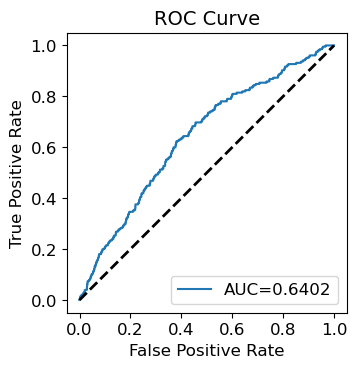

In [28]:
print('roc_plot')

plt.figure(figsize=(4, 4))
roc_value=roc_plot(TPCA_table1, pair_table1, int(len(TPCA_table1)*len(TPCA_table1)*0.4), 1, 'cityblock')
plt.gcf().set_facecolor('white')
plt.savefig(file_path_switch_between_sys(result_catalog+result_prefix+ppi_suffix_add+'roc.pdf'),dpi=600)
plt.close()

plt.figure(figsize=(4, 4))
roc_value=roc_plot(TPCA_table1, pair_table1, int(len(TPCA_table1)*len(TPCA_table1)*0.4), 1, 'cityblock')
plt.gcf().set_facecolor('white')
#plt.savefig(file_path_switch_between_sys(result_catalog+result_prefix+ppi_suffix_add+'roc.png'),dpi=600)
plt.show()